In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import pymorphy2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.datasets import fetch_20newsgroups
#import stop_words
import gensim
import nltk
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation

%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Data

In [3]:
topics = ['religion', 'economy', 'politics', 'science']

In [4]:
read_dictionary = np.load('allTexts.npy').item()

### Preprocessing

In [5]:
allTextList = list()
for category in topics:
    for topic in range(0,len(read_dictionary[category])):
        #for i in range(0,2):
        text = read_dictionary[category][topic][1]
        text = re.sub("xa0",' ', text)
        text = re.sub(r"\\",'', text)
        text = re.sub('n  ','', text)
        text = re.sub('n ','', text)
        text = re.sub(r'[$«»–()\.,%/—\-\"\'’…:;#№!?\r\n]', " ", text)
        text = re.sub('    ',' ', text)
        text = re.sub('   ',' ', text)
        text = re.sub('  ',' ', text)
        allTextList.append(text.replace(u'\xa0', ' '))

### LSA = TFIDF + SVD

In [6]:
vectorizer = TfidfVectorizer()

In [8]:
X = vectorizer.fit_transform(allTextList)
print(X.shape)

(800, 33823)


In [9]:
keys = list(vectorizer.vocabulary_.keys())
values = list(vectorizer.vocabulary_.values())

_ind = np.argsort(values)
words_sorted = np.asarray(keys)[_ind]

print(len(keys), len(values), len(words_sorted))

33823 33823 33823


In [11]:
N_TOPICS = 4
svd = TruncatedSVD(n_components=N_TOPICS, n_iter=10).fit(X)

['это' 'от' 'из' 'как' 'россии' 'для' 'по' 'не' 'что' 'на']
[ 0.10959933  0.11244026  0.11858681  0.1214485   0.12330937  0.12608687
  0.17419478  0.19975128  0.22480923  0.30821388]

['поддержку' 'кандидат' 'президента' 'избирательного' 'регистрации'
 'партии' '18' 'кандидата' 'цик' 'подписей']
[ 0.12594608  0.12768109  0.13569858  0.14277033  0.14319488  0.15481268
  0.15636783  0.16505623  0.22549133  0.30372346]

['аравии' 'саудовской' '2016' 'сокращении' 'баррелей' 'года' 'добычи'
 'соглашения' 'нефти' 'опек']
[ 0.12150505  0.12150505  0.13076864  0.14028374  0.14541689  0.16348644
  0.16612082  0.1846951   0.22998676  0.41437107]

['президента' 'заявил' 'штаба' 'пресс' 'президент' 'секретарь' 'рф'
 'путина' 'путин' 'песков']
[ 0.10535764  0.10584702  0.11769982  0.11811319  0.12140506  0.12297075
  0.17125086  0.17441899  0.18000017  0.18737758]



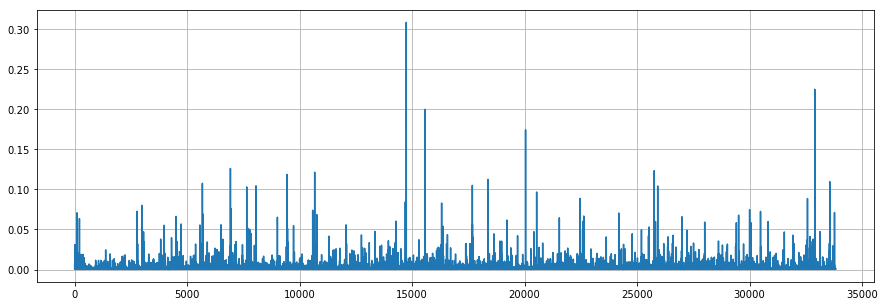

In [12]:
stub = [0] * N_TOPICS

for i in range(N_TOPICS):
    ind = np.argsort(svd.components_[i])[-10:]
    print(words_sorted[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()
    
    tmp = stub.copy()
    tmp[i] = 1
    plt.figure(figsize=(15, 5))
    plt.plot(svd.components_[i])
    plt.grid(True)

1. ...
2. Выборы
3. Нефть
4. Президент

#### Попробуем увеличить количество тем. (Начальные темы были: религия, экономика, политика, наука.

In [13]:
N_TOPICS = 10
svd = TruncatedSVD(n_components=N_TOPICS, n_iter=10).fit(X)

['это' 'от' 'из' 'как' 'россии' 'для' 'по' 'не' 'что' 'на']
[ 0.10959933  0.11244026  0.11858681  0.1214485   0.12330937  0.12608687
  0.17419478  0.19975128  0.22480923  0.30821388]

['поддержку' 'кандидат' 'президента' 'избирательного' 'регистрации'
 'партии' '18' 'кандидата' 'цик' 'подписей']
[ 0.12594579  0.12768127  0.13569967  0.14276994  0.14319484  0.15481266
  0.15636831  0.16505575  0.22549119  0.30372304]

['аравии' 'саудовской' '2016' 'сокращении' 'баррелей' 'года' 'добычи'
 'соглашения' 'нефти' 'опек']
[ 0.12150904  0.12150904  0.13076545  0.1402866   0.14541933  0.16348127
  0.16612346  0.18469844  0.22998959  0.41437709]

['президента' 'заявил' 'пресс' 'штаба' 'президент' 'секретарь' 'рф'
 'путина' 'путин' 'песков']
[ 0.10472305  0.10588782  0.11748241  0.11842129  0.12091681  0.12244818
  0.17121742  0.17510932  0.17907771  0.18604473]

['мест' 'крещение' 'воде' '19' 'января' 'крещения' 'купания' 'мчс'
 'крещенских' 'купаний']
[ 0.10366178  0.10822316  0.12443769  0.125

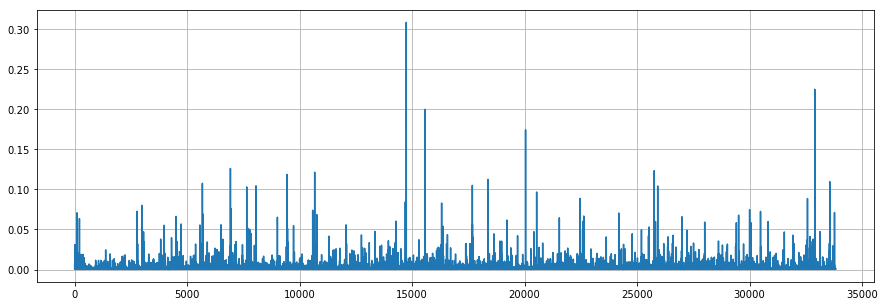

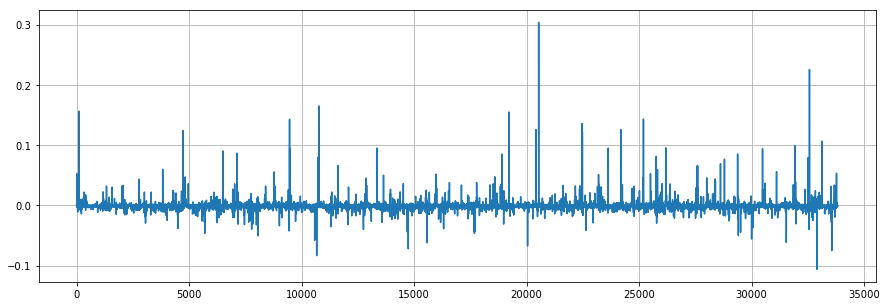

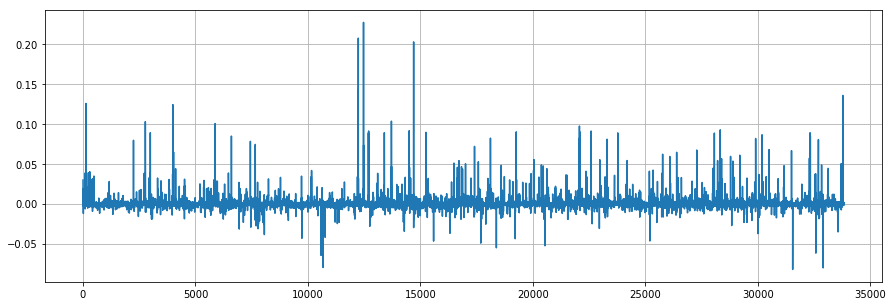

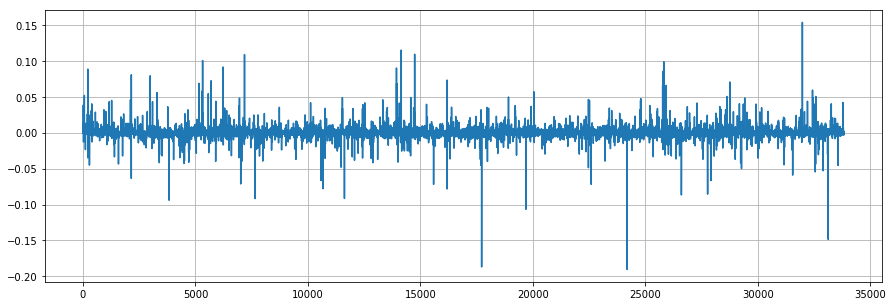

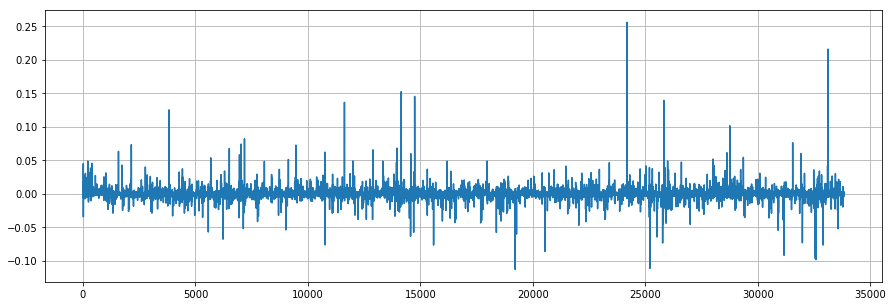

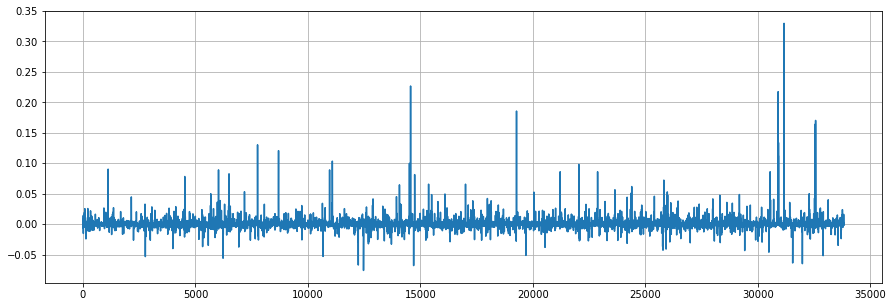

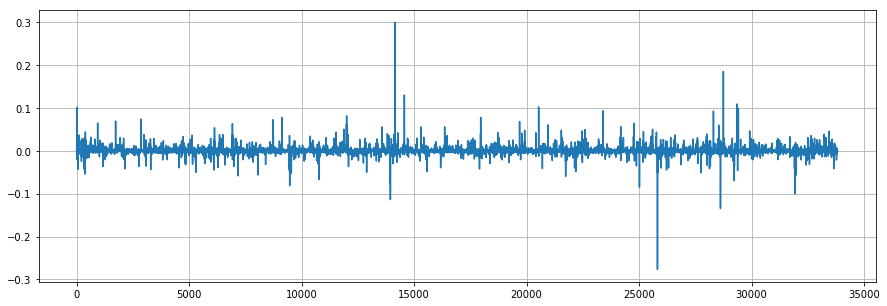

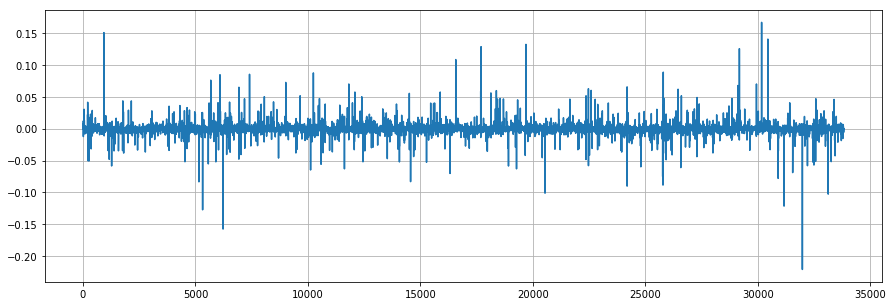

In [14]:
stub = [0] * N_TOPICS

for i in range(N_TOPICS):
    ind = np.argsort(svd.components_[i])[-10:]
    print(words_sorted[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()
    
    tmp = stub.copy()
    tmp[i] = 1
    plt.figure(figsize=(15, 5))
    plt.plot(svd.components_[i])
    plt.grid(True)

Добавились темы про крещение, деньги, украину и космос. Есть неопределённые темы.
#### крещение, деньги, украину и космос = религия, экономика, политика и технологии

### LDA = LSA + Dirichlet

In [41]:
corpus = []

for sentence in allTextList:
    tokens = sentence.split(' ')
#     tokens = [t for t in tokens if t not in stops]
    #tokens = [wnl.lemmatize(t) for t in tokens if t not in stops]
#     tokens = [stemmer.stem(t) for t in tokens if t not in stops]
    tokens = [t for t in tokens if len(t) >= 4]
    corpus.append(tokens)

In [42]:
dictionary = corpora.Dictionary(corpus)

In [43]:
X_bow = [dictionary.doc2bow(text) for text in corpus]

In [45]:
lda_gensim = gensim.models.ldamodel.LdaModel(X_bow, num_topics=N_TOPICS, id2word=dictionary, iterations=10)

In [46]:
lda_gensim.print_topics()

[(0,
  '0.003*"года" + 0.003*"России" + 0.003*"году" + 0.002*"более" + 0.002*"января" + 0.002*"также" + 0.002*"этом" + 0.002*"сказал" + 0.002*"будет" + 0.002*"которые"'),
 (1,
  '0.004*"России" + 0.003*"года" + 0.003*"будет" + 0.002*"после" + 0.002*"году" + 0.002*"может" + 0.002*"которые" + 0.002*"только" + 0.002*"время" + 0.002*"также"'),
 (2,
  '0.004*"года" + 0.004*"России" + 0.003*"году" + 0.002*"будет" + 0.002*"которые" + 0.002*"этом" + 0.002*"сказал" + 0.002*"также" + 0.002*"только" + 0.002*"президента"'),
 (3,
  '0.007*"года" + 0.004*"России" + 0.003*"будет" + 0.002*"году" + 0.002*"также" + 0.002*"которые" + 0.002*"более" + 0.002*"января" + 0.002*"только" + 0.002*"время"'),
 (4,
  '0.004*"России" + 0.003*"года" + 0.003*"будет" + 0.002*"также" + 0.002*"может" + 0.002*"году" + 0.002*"сказал" + 0.002*"президента" + 0.002*"время" + 0.002*"того"'),
 (5,
  '0.005*"года" + 0.003*"России" + 0.002*"будет" + 0.002*"году" + 0.002*"более" + 0.002*"заявил" + 0.002*"также" + 0.002*"этом" + 0.

#### sklearn

In [50]:
N_TOPICS = 7
lda_sklearn = LatentDirichletAllocation(n_topics=N_TOPICS, max_iter=10, batch_size=10, evaluate_every=1, verbose=1, n_jobs=4, learning_method='batch').fit(X)

iteration: 1, perplexity: 678885.2675
iteration: 2, perplexity: 630557.2685
iteration: 3, perplexity: 567450.2850
iteration: 4, perplexity: 469987.3854
iteration: 5, perplexity: 383433.8531
iteration: 6, perplexity: 341692.3436
iteration: 7, perplexity: 320002.4901
iteration: 8, perplexity: 305030.8012
iteration: 9, perplexity: 293434.6923
iteration: 10, perplexity: 283983.5751


In [51]:
lda_sklearn.components_.shape

(7, 33823)

['от' 'года' 'россии' 'как' 'из' 'для' 'по' 'не' 'что' 'на']
[ 0.10959933  0.11244026  0.11858681  0.1214485   0.12330937  0.12608687
  0.17419478  0.19975128  0.22480923  0.30821388]

['моисеев' 'репатриации' 'турции' 'письме' 'gram' 'энергетическом' 'панова'
 'ton' 'робота' 'органической']
[ 0.12594579  0.12768127  0.13569967  0.14276994  0.14319484  0.15481266
  0.15636831  0.16505575  0.22549119  0.30372304]

['наравне' 'купаниями' 'освящаемых' 'прорубях' 'сопровождается' 'массовыми'
 'празднуют' 'пасхой' 'христианских' 'ледяной']
[ 0.12150904  0.12150904  0.13076545  0.1402866   0.14541933  0.16348127
  0.16612346  0.18469844  0.22998959  0.41437709]

['церквами' 'поместными' 'швеции' 'действуют' 'око' 'солнце' 'украинская'
 'пасе' 'байк' 'вто']
[ 0.10472305  0.10588782  0.11748241  0.11842129  0.12091681  0.12244818
  0.17121742  0.17510932  0.17907771  0.18604473]

['2002' 'радомир' 'средиземноморской' 'aj129' 'кжк' 'украинская'
 'спутников' 'добыча' 'запорожской' 'ливия']
[ 0.1

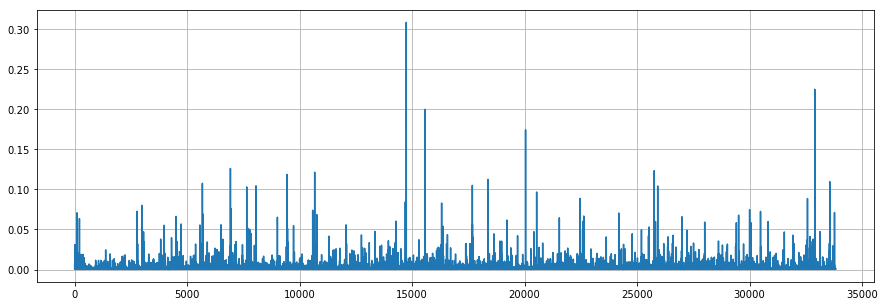

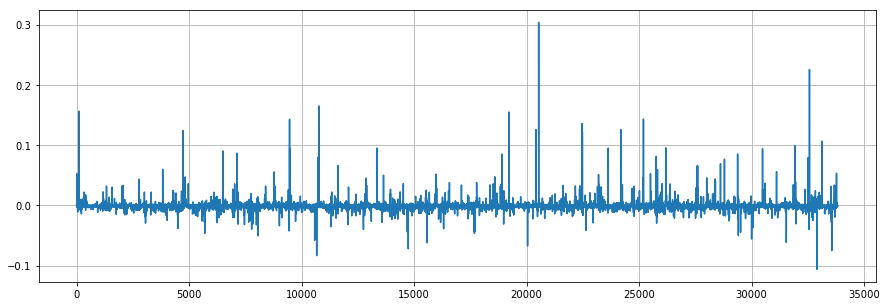

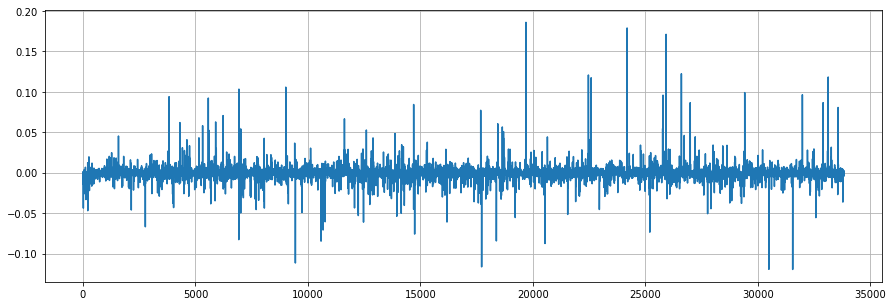

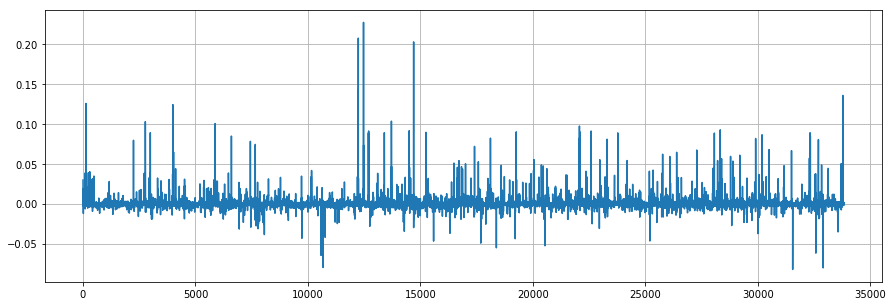

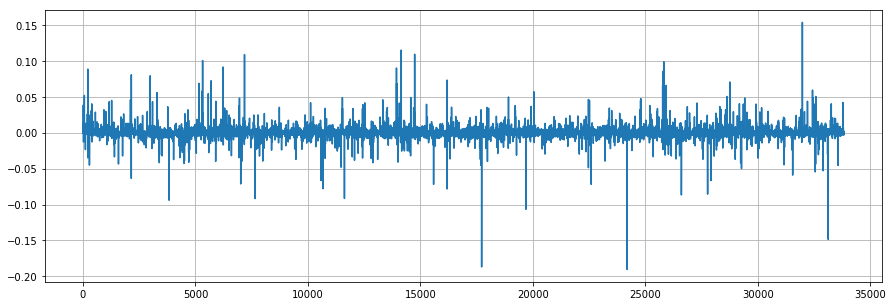

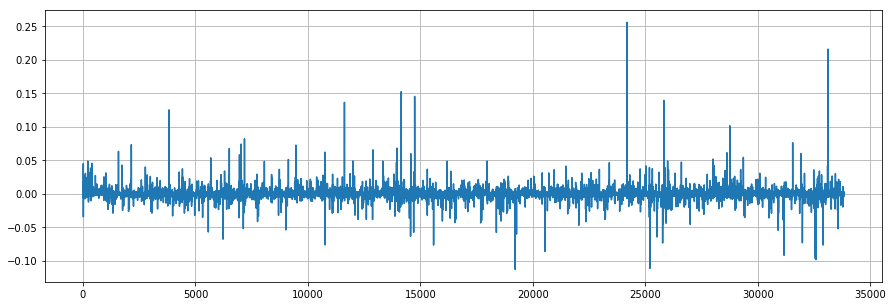

In [53]:
stub = [0] * N_TOPICS

for i in range(N_TOPICS):
    ind = np.argsort(lda_sklearn.components_[i])[-10:]
    print(words_sorted[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()
    
    tmp = stub.copy()
    tmp[i] = 1
    plt.figure(figsize=(15, 5))
    plt.plot(svd.components_[i])
    plt.grid(True)